In [2]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [3]:
class MyState(MessagesState, total=False): pass

In [4]:
from langchain.tools import tool

In [5]:
@tool
def add(a: int, b: int) -> int:
    """Adds two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: sum of two numbers
    """
    return a + b

In [6]:
@tool
def sub(a: int, b: int) -> int:
    """subtracts two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: difference of two numbers
    """
    return a - b

In [7]:
@tool
def mul(a: int, b: int) -> int:
    """product of two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: product of two numbers
    """
    return a * b

In [8]:
@tool
def div(a: int, b: int) -> int|float:
    """division of two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: division  two numbers
    """
    return a // b

In [9]:
@tool
def apply_discount(total: int, discount: float) -> int|float:
    """
    Applies a discount percentage to a total amount.

    Args:
        total: The original total amount (integer).
        discount: The discount percentage (float, e.g., 0.10 for 10%).

    Returns:
        The new total amount after applying the discount (float).
        It returns float because the calculation of discount often results in a non-integer value.
    """
    # Calculate the discount amount: total * discount
    discount_amount = total * discount

    # Calculate the final price: total - discount_amount
    final_price = total - discount_amount

    # Alternatively, calculate the final price directly: total * (1 - discount)
    # final_price = total * (1 - discount)

    return final_price

In [10]:
import math
@tool
def calculate_emi(principal: int | float, annual_rate: float, years: int) -> float:
    """
    Calculates the Equated Monthly Installment (EMI) for a loan.

    EMI is calculated using the formula:
    EMI = P * R * [ (1 + R)^n / ((1 + R)^n - 1) ]

    Where:
    P = Principal loan amount
    R = Monthly interest rate (annual_rate / 12 / 100)
    n = Total number of monthly installments (years * 12)

    Args:
        principal: The total loan amount (P).
        annual_rate: The annual interest rate (e.g., 8.5 for 8.5%).
        years: The loan tenure in years.

    Returns:
        The EMI amount per month (float).
    """
    if annual_rate == 0:
        # Avoid division by zero if rate is 0%. EMI is simply Principal / total months.
        return principal / (years * 12)

    # 1. Calculate the Monthly Interest Rate (R)
    # The rate must be converted from a percentage (e.g., 8.5) to a decimal (0.085)
    # and then divided by 12 for the monthly rate.
    monthly_rate = (annual_rate / 100) / 12

    # 2. Calculate the Total Number of Payments (n)
    num_payments = years * 12

    # 3. Apply the EMI formula
    # EMI = P * R * [ (1 + R)^n / ((1 + R)^n - 1) ]

    # Numerator part of the fraction: R * (1 + R)^n
    numerator = monthly_rate * (math.pow(1 + monthly_rate, num_payments))

    # Denominator part of the fraction: (1 + R)^n - 1
    denominator = math.pow(1 + monthly_rate, num_payments) - 1

    # The final EMI calculation
    emi = principal * (numerator / denominator)

    return emi

In [11]:
@tool
def calculate_percentage(part: int | float, whole: int | float) -> float:
    """
    Calculates what percentage the 'part' is of the 'whole'.

    The formula used is: (part / whole) * 100

    Args:
        part: The smaller number or portion of the whole.
        whole: The total amount or the base number (cannot be zero).

    Returns:
        The percentage (float).

    Raises:
        ValueError: If 'whole' is zero.
    """
    if whole == 0:
        raise ValueError("The 'whole' value cannot be zero when calculating a percentage.")

    # Calculate the ratio, then multiply by 100 to get the percentage
    percentage = (part / whole) * 100
    return percentage

In [12]:
from utils import get_llm

llm = get_llm()

In [13]:
tools = [add, sub, mul, div, apply_discount, calculate_emi, calculate_percentage ]

In [14]:
response = llm.invoke("What is 4 + 5")
response

AIMessage(content='4 + 5 = 9', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 7, 'total_token_count': 81, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 7}], 'thoughts_token_count': 67, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -1.4366813387189592, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--55e8e434-4ef5-4a12-942d-063df195ae79-0', usage_metadata={'input_tokens': 7, 'output_tokens': 7, 'total_tokens': 81, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 67}})

In [15]:
response = llm.invoke("What is capital of india")
response

AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 5, 'candidates_token_count': 9, 'total_token_count': 116, 'prompt_tokens_details': [{'modality': 1, 'token_count': 5}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 102, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -4.166131761338976, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--b5b5fa8f-e7e5-44a3-b7ab-3fade2990a50-0', usage_metadata={'input_tokens': 5, 'output_tokens': 9, 'total_tokens': 116, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 102}})

In [16]:
# making llm aware of tools
llm_with_tools = llm.bind_tools(tools)

In [17]:
# checking how this works
response = llm_with_tools.invoke("What is 4 + 5")

In [18]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}, '__gemini_function_call_thought_signatures__': {'85f2c385-05b8-4e7f-ad8a-7b1c8b8cb830': 'CqACAePx/15xmlPI7WEu+pw57N1vjQ9rM+OcUXplAbob+jmc/xVbt8jIkl99kMcEnCA0RblikaSlSbi3qnszkoDtd82z+wWjIQq3fa79NURTf6u2emYB5/AbGFLn+R5Kb6jTtd1HXZpYU409O1cicoy8nB4/l9C3c6dxu1H6f3b4UxIjO1dhvpT3hECYzKXvegUPYtkFXVXlPFJHaFFUvhz+fW3gNGCQvkiZWShwkwnCpE2hxvM7Wfu28P50/8yWAElIcdlZ11DMgiOWAjte3IIKKu/lW89sSoXdImIxOhA68g6PtIvOFU5ccxmwoVBANtqkTQ9DtBzrlqIT0LPhu023SubHmm61hXnpTTCrslC/35jfMCDdw8JMrqtyi57lzRdL'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 530, 'candidates_token_count': 5, 'total_token_count': 606, 'prompt_tokens_details': [{'modality': 1, 'token_count': 530}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 71, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP'

In [19]:
# checking how this works
response = llm_with_tools.invoke("Apply discount of 10% on total bill of 7765")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.1, "total": 7765.0}'}, '__gemini_function_call_thought_signatures__': {'b5db7bae-6698-4cf4-bb87-39cfb918f1ae': 'CvgCAePx/14gHMxqIyZTDQc9Z+j8NduU8/wWsxXirtPdQpA4cqe9zHDYYxuqeHXt+/VYHmaFi3+oioxOKkPCTT2T8kYHhnGwlLPtfmgXwuoDGUx02ouDbMEsnRq4sKzVBG95ZmNaDL3j/8SV/hnTnuZc/w/qHKAdrwi/5BE0/DCj2l8yq1eU4cwgi+YQvpc17jTiyZFgRDHhwbur46n8nqczRxcyazNyHw3bWhWdVrAD2LQctetPd3I3xzt49OAETygXTY1Was63JZj7r2eTH+kDY38OSs6eGBRTjswm7rohUXvxyBJ7AMrGenc68jgtv+FzcI9gzabU7zq4B+53X7VHn+6bHiRY2CJZAM0c81Bv8MCu1uVVnnU/nCk2OxilcrU1HSWkLJjBLmzZ2yNLRoYx+S/dpHL+mDGsue4GiwaCluXdM3Dlpui1AeYYI2I6B9Nz8/Vu87vPo4yFgOGZjsX8jxMVHnibOY+VFI690EvTYoGTIwmIWPmbRw=='}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 539, 'candidates_token_count': 7, 'total_token_count': 659, 'prompt_tokens_details': [{'modality': 1, 'token_count': 539}], 'candidates_tokens_details': [{'mo

In [20]:
# checking how this works
response = llm_with_tools.invoke("Calculate monthly emi of 100000 at 7% yearly interest for 3 years")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'calculate_emi', 'arguments': '{"annual_rate": 7.0, "principal": 100000.0, "years": 3.0}'}, '__gemini_function_call_thought_signatures__': {'a8800940-45f6-45b5-8264-2d9dff9292ec': 'Co0DAePx/15MYIl3L8+uqh6jK9GpanCN0/yTZZIqYifY/PTB+QRw9Q0O+trrScO9zxb/aD/CSK6KIGUtHgoqL7cDBXSVU/EcMxgtUVla8mzvYGms2LHhyEhQjotfgu1XRJToN35p2nSKjNo918IulWmusr9VtfHd4IZHMjjrF+fkdbvjaLK2UY7n0SQfaRzkkZJNkWamjv/EVF17gGzvk7G67b5RkQkwgBvYuLFBx0y4rgHQQkfHw6gOZh1kHaxvDeMyQQlw7jKEPGGWOMdhsHzmN3EkDCy/A8B4aKFy/OI7TejuHgV6/WuLXFQAMfW+YdKJRK5W58bLhmugE4ImgE2XISod5i1nJOAmR3BYW2vKslLv6NXIED3b6RTzFhffd6uPZSWxr+VxiLgSMv1WWLQDEsHNN+8ORG6e35wegyHpofzh3hg8mKSPtEiV2rnaCrW+RzVl4gkYgQBgUAJokqQWlpl+YY4XrV+/1y55bKfCQ0t8sKNL53EFtH5imrgKDIjHYAaVGQj1gOFU9RM+wQ=='}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 544, 'candidates_token_count': 11, 'total_token_count': 653, 'prompt_tokens_details': [{'modality': 1, 'toke

In [21]:
response = llm_with_tools.invoke("What is capital of india")
response

AIMessage(content='I am sorry, I cannot answer your question. I am only a calculator.\n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 528, 'candidates_token_count': 17, 'total_token_count': 545, 'prompt_tokens_details': [{'modality': 1, 'token_count': 528}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 17}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.27819100548239317, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--32432d3b-6efe-4314-9a37-6c64aa879f2b-0', usage_metadata={'input_tokens': 528, 'output_tokens': 17, 'total_tokens': 545, 'input_token_details': {'cache_read': 0}})

In [22]:
# Langgraph
from langgraph.prebuilt import ToolNode, tools_condition

# node
def ask_llm(state: MyState):
    """This will asks llm
    """
    return { "messages": [llm_with_tools.invoke(state['messages'])] }

tool_node = ToolNode(tools)

In [23]:
tool_graph = StateGraph(MyState)
tool_graph.add_node("ask", ask_llm)
tool_graph.add_node("tools", tool_node)

In [24]:
tool_graph.set_entry_point("ask")
tool_graph.add_conditional_edges("ask", tools_condition, {
    "tools": "tools",
    "__end__": END
})
tool_graph.add_edge("tools", "ask")
graph = tool_graph.compile()

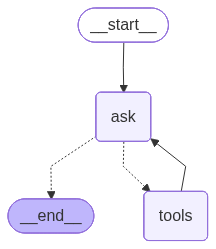

In [25]:
graph

In [26]:
from langchain_core.messages import HumanMessage, SystemMessage

In [27]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("What is capital of india?")
            ]
    }
)

In [28]:
response


{'messages': [HumanMessage(content='What is capital of india?', additional_kwargs={}, response_metadata={}, id='1ca64482-5c9f-4cf8-bb86-7d75c2cdffc3'),
  AIMessage(content='I am sorry, I cannot answer this question as it is beyond my current capabilities.\n', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 529, 'candidates_token_count': 18, 'total_token_count': 594, 'prompt_tokens_details': [{'modality': 1, 'token_count': 529}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 18}], 'thoughts_token_count': 47, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.6211485332912869, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash'}, id='lc_run--b57990a8-5b0a-459f-a37f-6d2ba85b6be6-0', usage_metadata={'input_tokens': 529, 'output_tokens': 18, 'total_tokens': 594, 'input_token_details': {'cache_read': 0}, 'output_token_details': {

In [29]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("What is 4 + 5")
            ]
    }
)

In [30]:
response

{'messages': [HumanMessage(content='What is 4 + 5', additional_kwargs={}, response_metadata={}, id='9a51d3a1-156f-4c0d-8bff-72ac85342f6e'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}, '__gemini_function_call_thought_signatures__': {'d9b11920-efa9-45a2-98af-1ffc54a9e5b8': 'CsICAePx/167ZiAf3kKYm6ahQC0UKtmfySvpbgBYxQpBJjuUgvxktWEhBBBFk1KOw/mxdY5x3X/7GSiSHpULuWA+S7GXoREIZGzyHm9mKE5cUzAQVWJDBC+idkpUsWRUdYZIoUwDgU3sRWIcqXO9WZxM6fTLw+S9IHJQDAMtSZNEJ9UaOGOL9gzo4dUPptFRX9AkFjQtyBoJ0DvhSijvcfGhBijkcKi7NctlXofFVyWKre+Ojadb1e4MBejFOnswDyrnbnnZTu2OQptgp9H0CUK0Y3C6T4rLydzZ47qCa80fA1WlBbq1Mr0GWzcfIxILDVq3msKw9HjpMwv1KGUikTb2qLbRhALaWOSid4uI7W6A+tlNPhKCfWdz6OHWcgRTmMko8QbXFzV9f/O3livSgW9fcm4RFWFG8LuHPsEEZg2AAik+Hg=='}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 530, 'candidates_token_count': 5, 'total_token_count': 615, 'prompt_tokens_details': [{'modality': 1, 'token_coun

In [31]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("My grocery bill is 17000"),
            HumanMessage("Apply 15% discount and add 5% tax"),
        ]
    }
)
response

{'messages': [HumanMessage(content='My grocery bill is 17000', additional_kwargs={}, response_metadata={}, id='849eab0b-959a-482c-8d3f-ded14a09919c'),
  HumanMessage(content='Apply 15% discount and add 5% tax', additional_kwargs={}, response_metadata={}, id='d8474d56-de9c-4a15-8e08-b79759a12f9d'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.15, "total": 17000.0}'}, '__gemini_function_call_thought_signatures__': {'5a808785-6737-48ce-8708-511850fe7eb8': 'Cq4IAePx/154UVXjXoCLUS5GpOATJGAEYXZDMCOVbLYR3pYKmJu76ZkS9NpMhPfBgX89cFOFOJ5dVMs9rZKE1qVNKCq4BOxtmxO7f2cnwVXlZO9vvYqCMdLAMxzVhJ6Xjiyo1GxMsysql2zpIfzgH79fmDtPt6gy9NL5G2Dqt/Zz0XlTgTOkdo89RU+AQBYv10Z2i5QnT0RxSXEDPoZaCCJJz1h33Jo5Zo7nsL1GxK96LAhoAzwn/z44SLsYi7J6TFjdWufaws0h9M6i6RJeyFLj0YuqVeaRbxWTNdAcbSZ2cg8HI1EZxN7P2qDGg9V1o8GgoAjknctHsKlDS+3GvVjt7oZQHooAQR8uoEjkmA7Z3wM7N3bW6+KFoPR2yUT8IJOBLkqvRmjfhKnQ/feMhOv5FxAdQQbVtKJ3H58gWoR8h0Bwwsx0GRVXpybaZNS4bgOkHZqTjOWj9ZO4j+rgeI6

In [32]:
response = graph.invoke(
    {
        "messages": [
            HumanMessage("I want to buy a iphone which is worth 130000"),
            HumanMessage("My Amex card gives me 3% cashback and instant discount of 1%"),
            HumanMessage("What would be the price of iphone for me now"),
        ]
    }
)
response

{'messages': [HumanMessage(content='I want to buy a iphone which is worth 130000', additional_kwargs={}, response_metadata={}, id='65245ede-9a0c-46ac-a297-9440b79bd6b7'),
  HumanMessage(content='My Amex card gives me 3% cashback and instant discount of 1%', additional_kwargs={}, response_metadata={}, id='3d0465b5-8acb-44af-84fc-41148b4fb2c9'),
  HumanMessage(content='What would be the price of iphone for me now', additional_kwargs={}, response_metadata={}, id='1fe7a6b5-2d89-49b4-8314-2036b5340a8b'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'apply_discount', 'arguments': '{"discount": 0.01, "total": 130000.0}'}, '__gemini_function_call_thought_signatures__': {'8457e083-319f-4538-a688-918a7d55506a': 'CowHAePx/17vBIX0zY25GftV9gK3KEKQDWu9wfiOvfSBCEG+43ToIoLbOGvfWId1VMmPmtjGEIAissbBrpemyGPvYq4NJazswC0LRqOwDYcPAvAHXhCOoNoRjpvFb+5QzuO/8gW5pnLFOeCRFDzyENHOQfnt1r3puYDbaV1Yhoz5r1GqXZHrNKNDq6LO3AOy2ldn6yUuD1Fn14TE5O/oL2Ramw3eBZXJv5a5t8Vr8gJz2XtQ3BiLpwpjJcOOjo+B/Ju1xaHd